# <--ML model-->
 

## House Price Prediction Project

## Project Goal

## Loading Modules/ Libraries

In [333]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import CategoricalDtype

from sklearn.preprocessing import StandardScaler

## Loading Dataset 

In [6]:
train_data_path = r"C:\Users\nehaa\OneDrive\Desktop\House_price_prediction\House Data\train.csv"

test_data_path = r"C:\Users\nehaa\OneDrive\Desktop\House_price_prediction\House Data\test.csv"

df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

print("Shape of df_train:", df_train.shape)
print("Shape of df_test:", df_test.shape)

Shape of df_train: (1460, 81)
Shape of df_test: (1459, 80)


In [7]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Data Overview


## Features to Encode/Convert to Numerical Format

1. OverallQual
2. OverallCond
3. YearBuilt
4. Foundation
5. Electrical
6. KitchenQual
7. GarageType
8. GarageFinish
9. Fence



## Data Consolidation

In [14]:
df = pd . concat([df_train,df_test])
print("shape of Consolidated date / DF:",df.shape)

shape of Consolidated date / DF: (2919, 81)


In [15]:
df.head(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0


In [16]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


In [17]:
df.tail(8)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1451,2912,20,RL,80.0,13384,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN
1452,2913,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,NaN
1453,2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,NaN
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


## Dataset Insights

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

# Features with Most Null Values

- Alley
- FireplaceQu
- PoolQC
- Fence
- MiscFeature


In [23]:
int_features = df.select_dtypes(include=["int64"]).columns
print("Total number of integer features:", int_features.shape[0])

print("Integer feature names:", int_features.tolist())


    

Total number of integer features: 26
Integer feature names: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [24]:
Float_features = df.select_dtypes(include=["Float64"]).columns
print("Total number of integer features:", Float_features.shape[0])

print("Floating feature names:", Float_features.tolist())

Total number of integer features: 12
Floating feature names: ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [26]:
cat_features = df.select_dtypes(include=["object"]).columns
print("Total number of categorical features:", cat_features.shape[0])

print("categorical feature names:", cat_features.tolist())


Total number of categorical features: 43
categorical feature names: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Statistical Summary of Numerical Features


In [11]:
import pandas as pd

# Use forward slashes (this works in Python on Windows too)
train_path = 'C:/Users/nehaa/OneDrive/Desktop/House_price_prediction/House Data/train.csv'

# Load the CSV file into a DataFrame
train_df = pd.read_csv(train_path)

# Display summary statistics
print(train_df.describe())



                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [14]:
train_path = r'C:\Users\nehaa\OneDrive\Desktop\House_price_prediction\House Data\train.csv'

df = pd.read_csv(train_path)
shape_of_describe = df.describe().shape
print(shape_of_describe)

(8, 38)


In [20]:
print(df.columns)

df["MSSubClass"]


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64

## Handling missing value

## Null Value Exploration

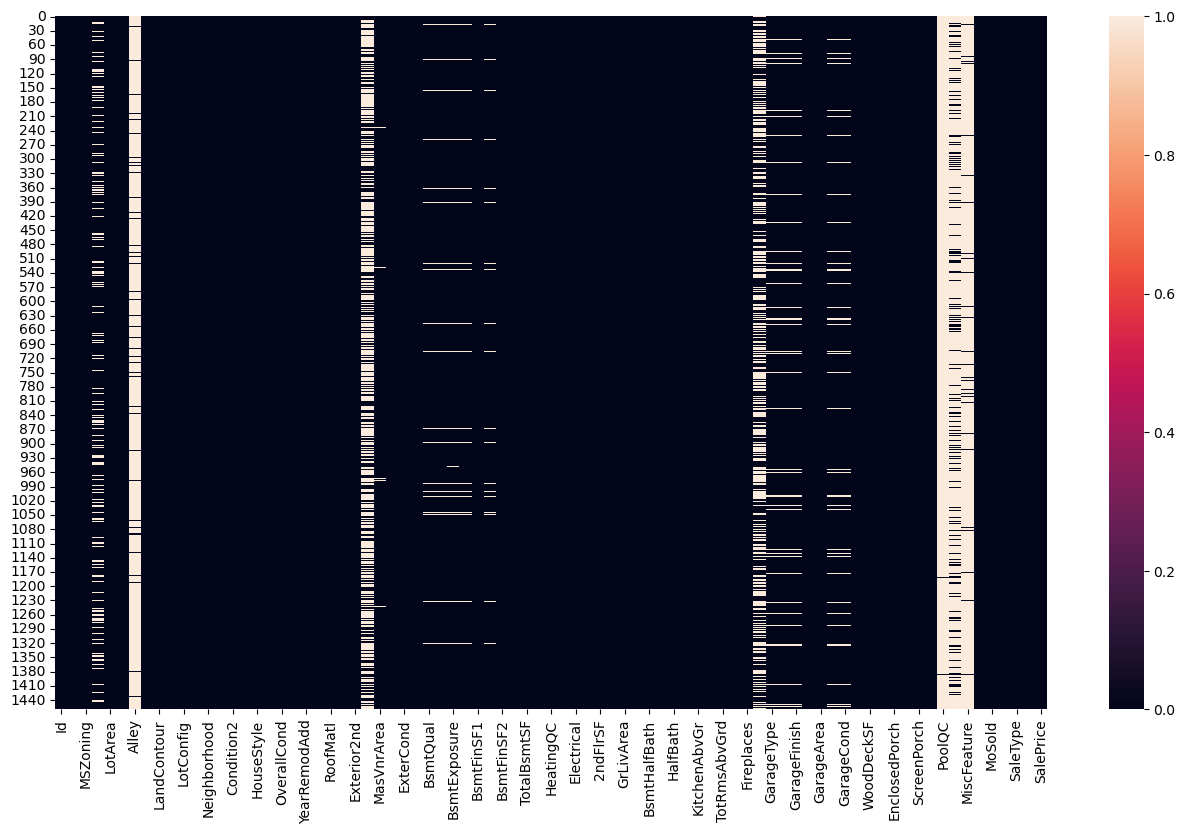

In [25]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs("EDA_img", exist_ok=True)

plt.figure(figsize=(16, 9))
sns.heatmap(df.isnull())
plt.savefig("EDA_img/heatmap_DF_of_null_values.png")



## Analysis of Missing Data: Feature-wise Null Value Percentage

In [41]:
# Set index as id column
df = df.set_index("Id")

In [34]:
print("Column names:", df.columns)


Column names: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [38]:
null_counts = df.isnull().sum()/df.shape[0]*100
null_percent

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [43]:
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

## Refining the Dataset: Removing Unnecessary Features

In [44]:
miss_value_50_perc = null_percent[null_percent>50]
miss_value_50_perc

Alley          93.767123
MasVnrType     59.726027
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [46]:
df["Alley"].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [47]:
miss_value_20_50_perc = null_percent[null_percent>20&(null_percent<55)]
miss_value_20_50_perc

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [48]:
miss_value_5_20_perc = null_percent[(null_percent>20)&(null_percent<21)]
miss_value_5_20_perc

Series([], dtype: float64)

In [56]:
df["LotFrontage"].value_counts().head()


LotFrontage
60.0    143
70.0     70
80.0     69
50.0     57
75.0     53
Name: count, dtype: int64

## Visualization of Missing Data: Heatmap Analysis

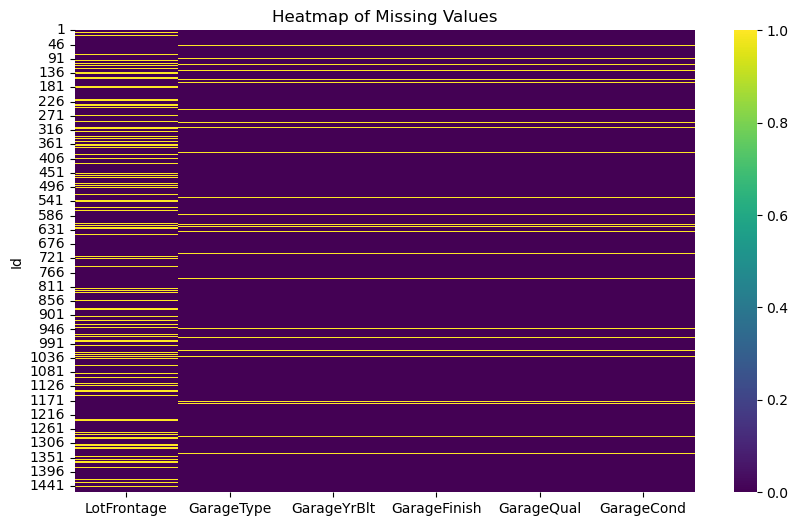

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot (replace with actual column names from your DataFrame)
columns_to_plot = ['LotFrontage', 'GarageType', 'GarageYrBlt','GarageFinish', 'GarageQual', 'GarageCond']

# Verify if columns_to_plot exist in your DataFrame
if all(col in df.columns for col in columns_to_plot):
    # Create the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[columns_to_plot].isnull(), cmap='viridis', cbar=True)
    plt.title('Heatmap of Missing Values')
    plt.show()
else:
    missing_columns = [col for col in columns_to_plot if col not in df.columns]
    print(f"Columns {missing_columns} not found in DataFrame.")




## Missing Value Imputation

In [83]:
missing_value_feat = null_percent[null_percent>0]
print("Total missing value features:- ",len(missing_value_feat))

Total missing value features:-  19


In [84]:
missing_value_feat 

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [95]:
cat_features = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt']

keys_in_cat_features = missing_value_feat.keys().isin(cat_features)

# Example usage
print(keys_in_cat_features)


[ True False False False False False False False False False False False
 False False False False False False False]


In [101]:
# Assuming `cat_features` is defined as a list of categorical feature names
cat_features = ['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                'GarageFinish', 'GarageQual']

# Calculate percentage of missing values for each categorical feature
missing_value_perc = {}
for col in cat_features:
    missing_percent = df[col].isnull().mean() * 100
    missing_value_perc[col] = missing_percent

# Display the output with numeric value in front of each feature
for col, perc in missing_value_perc.items():
    print(f"{perc:.6f} {col}")




0.000000 MSZoning
93.767123 Alley
0.000000 Utilities
0.000000 Exterior1st
0.000000 Exterior2nd
59.726027 MasVnrType
2.534247 BsmtQual
2.534247 BsmtCond
2.602740 BsmtExposure
2.534247 BsmtFinType1
2.602740 BsmtFinType2
0.068493 Electrical
0.000000 KitchenQual
0.000000 Functional
47.260274 FireplaceQu
5.547945 GarageType
5.547945 GarageFinish
5.547945 GarageQual


In [104]:
cat_na_feat = missing_value_feat[missing_value_feat.keys().isin(cat_features)]
print("total number of categorical missing features =", len(cat_na_feat))
cat_na_feat

total number of categorical missing features = 12


Alley           93.767123
MasVnrType      59.726027
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
dtype: float64

In [108]:
# Assuming `int_features` is defined as a list of integer feature names
int_features = ['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
                'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
                'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
                'MoSold', 'YrSold', 'SalePrice']

# Filter missing_value_feat based on int_features
int_na_feat = {key: value for key, value in missing_value_feat.items() if key in int_features}

# Print the total number of integer missing features and the features themselves
print("Total number of integer missing features =", len(int_na_feat))
int_na_feat


Total number of integer missing features = 0


{}

### Handling MSZoning 

In [112]:
df["MSZoning"].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='MSZoning'>

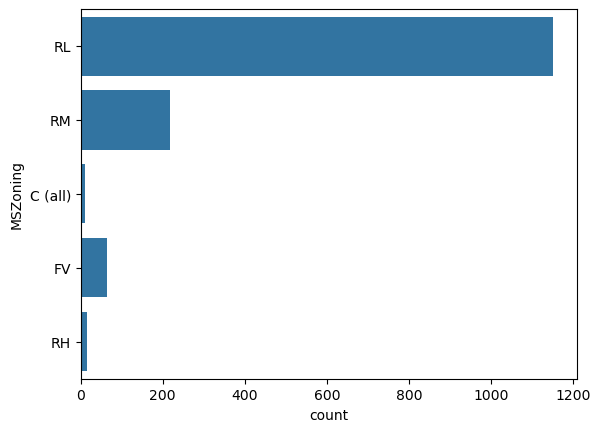

In [113]:
sns.countplot(df["MSZoning"])

In [116]:
MSZoning_mode = df["MSZoning"].mode()[0]
MSZoning_mode

'RL'

In [123]:
import numpy as np

# Calculate the mode of MSZoning
MSZoning_mode = df["MSZoning"].mode()[0]

# Replace NaN values in MSZoning with its mode using .loc or .iloc
df.loc[df["MSZoning"].isnull(), "MSZoning"] = MSZoning_mode

# Check if there are any more NaN values in MSZoning
df["MSZoning"].isnull().sum()



0

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

def oldNewCountPlot(df, df_new, feature):
    plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference

     plt.subplot(121)
    sns.countplot(df[feature])
    plt.title("Old Data Distribution")

    plt.subplot(122)
    sns.countplot(df_new[feature])
    plt.title("
    plt.tight_layout()  # Ensures the plots are properly spaced
    plt.show()


C:\Users\nehaa\AppData\Local\Temp\ipykernel_12360\2180170200.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new["MSZoning"].fillna(df["MSZoning"].mode()[0], inplace=True)


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

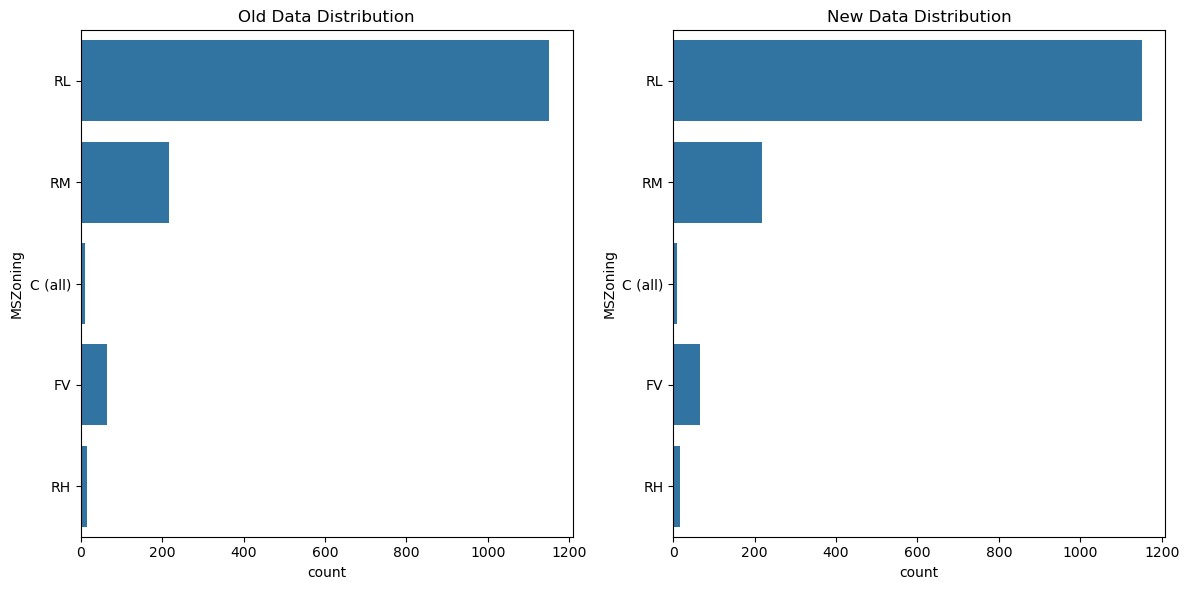

In [163]:
df_new = df.copy()

# Perform necessary modifications to df_new
# For example, you can fill missing values in "MSZoning" in df_new
df_new["MSZoning"].fillna(df["MSZoning"].mode()[0], inplace=True)

# Check the columns in df_new
print(df_new.columns)

# Now call oldNewCountPlot function
oldNewCountPlot(df, df_new, "MSZoning") 

## Handling Alley 

In [153]:
import pandas as pd

# Example DataFrame creation
data = {
    "Alley": ['Paved', 'Gravel', 'None', 'Paved', 'None', 'Gravel', 'None', 'None', 'Paved']
}

df_mvi = pd.DataFrame(data)

# Now you can get the value counts of "Alley"
alley_value_counts = df_mvi["Alley"].value_counts()
print(alley_value_counts)



Alley
None      4
Paved     3
Gravel    2
Name: count, dtype: int64


In [154]:
df_mvi["Alley"].fillna("NA", inplace=True)
alley_count = df_mvi["Alley"].value_counts()
print(alley_count)


Alley
None      4
Paved     3
Gravel    2
Name: count, dtype: int64


C:\Users\nehaa\AppData\Local\Temp\ipykernel_12360\2073504339.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Alley"].fillna("NA", inplace=True)


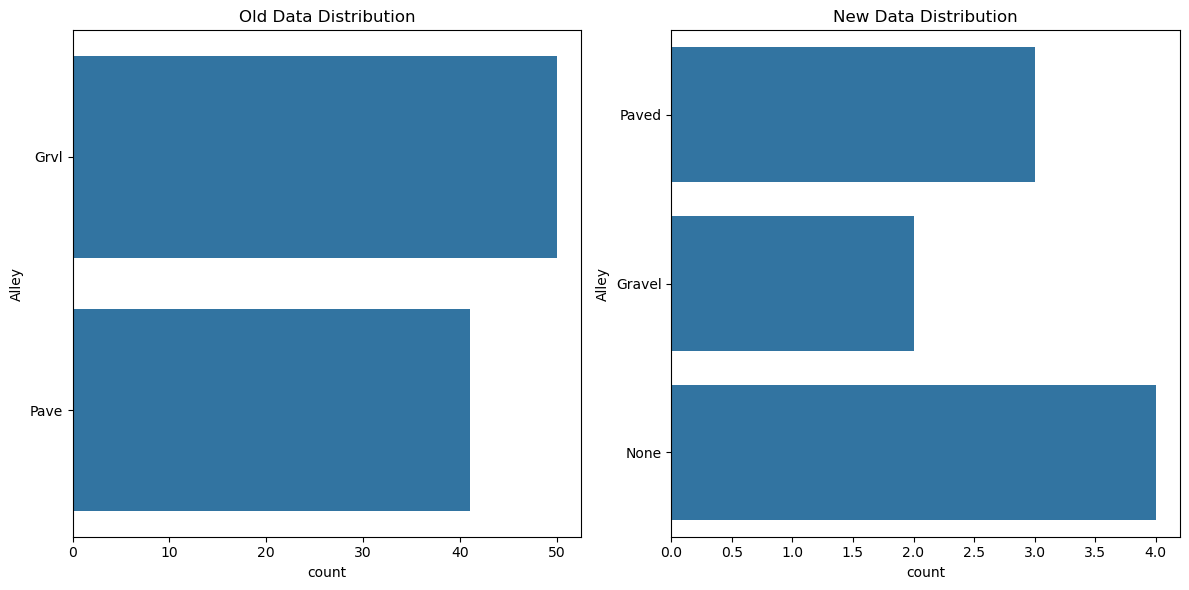

In [156]:
oldNewCountPlot(df, df_mvi,"Alley")

## Handling LotFrontage 

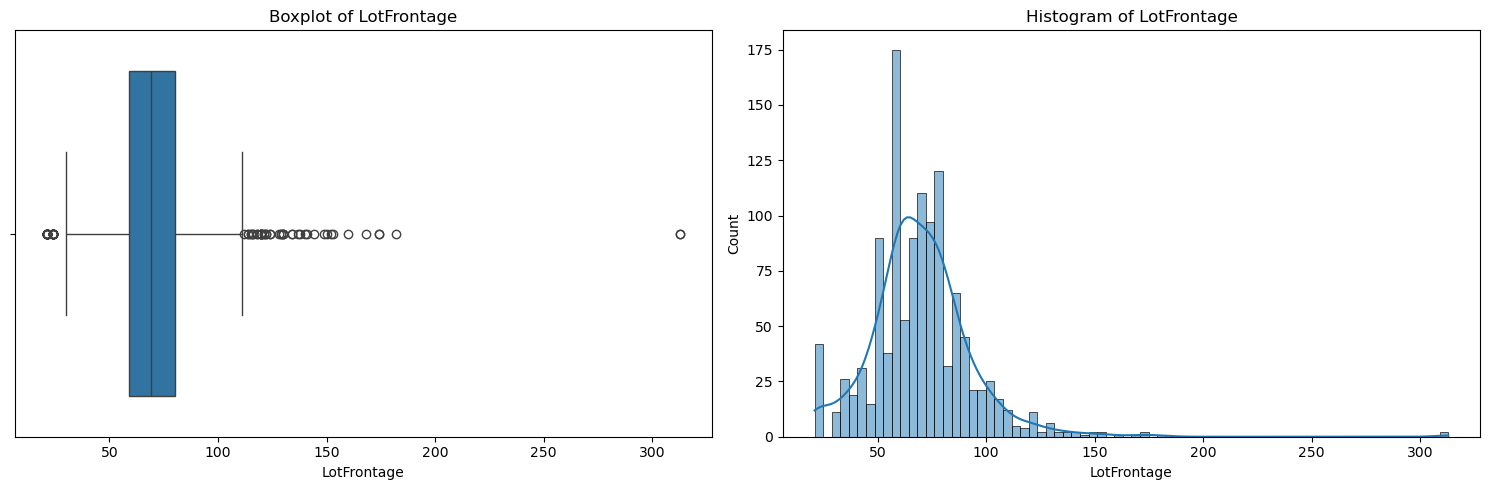

In [168]:
def boxhistPlot(df, feature, figsize=(15, 5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    
    plt.subplot(122)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    
    plt.tight_layout()
    plt.show()

# Example usage:
boxhistPlot(df, "LotFrontage")


In [170]:
lotfrontage_mean= df["LotFrontage"].mean()
lotfrontage_mean

70.04995836802665

In [178]:
import pandas as pd
import numpy as np

# Sample DataFrames for demonstration
df = pd.DataFrame({
    "LotFrontage": [80, np.nan, 70, 60, np.nan, 85]
})

df_mvi = df.copy()  # Creating a copy of df for demonstration

# Check if 'LotFrontage' exists in df and df_mvi
print("Columns in df:", df.columns)
print("Columns in df_mvi:", df_mvi.columns)

if 'LotFrontage' in df.columns and 'LotFrontage' in df_mvi.columns:
    # Calculate the mean of the "LotFrontage" column
    lotfrontage_mean = df["LotFrontage"].mean()

    # Replace missing values in "LotFrontage" column of df_mvi with the calculated mean
    df_mvi["LotFrontage"].replace(np.nan, lotfrontage_mean, inplace=True)

    # Check if there are any remaining missing values in "LotFrontage"
    missing_values = df_mvi["LotFrontage"].isnull().sum()
    print("Number of missing values in 'LotFrontage':", missing_values)
else:
    print("'LotFrontage' column not found in one of the DataFrames.")


Columns in df: Index(['LotFrontage'], dtype='object')
Columns in df_mvi: Index(['LotFrontage'], dtype='object')
Number of missing values in 'LotFrontage': 0


C:\Users\nehaa\AppData\Local\Temp\ipykernel_12360\1433395735.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["LotFrontage"].replace(np.nan, lotfrontage_mean, inplace=True)


C:\Users\nehaa\AppData\Local\Temp\ipykernel_12360\4083505415.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[feature])
C:\Users\nehaa\AppData\Local\Temp\ipykernel_12360\4083505415.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_new[feature])


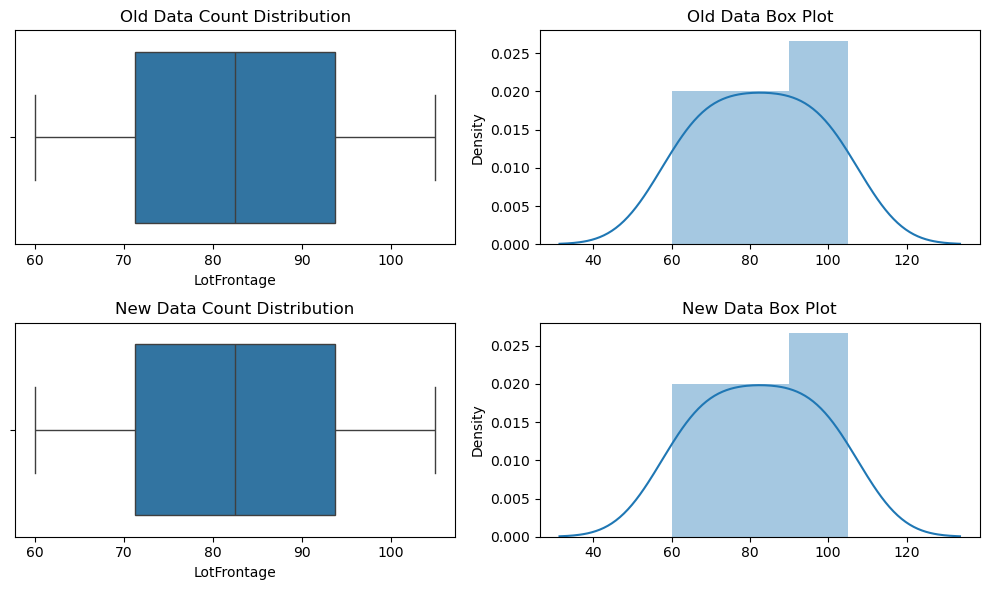

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def oldNewCountPlot(df, df_new, feature):
    plt.figure(figsize=(10, 6))

    # Count plot for old data
    plt.subplot(221)
    sns.boxplot(x=df[feature])
    plt.title("Old Data Count Distribution")

    # Box plot for old data
    plt.subplot(222)
    sns.distplot(x=df[feature])
    plt.title("Old Data Box Plot")

    # Count plot for new data
    plt.subplot(223)
    sns.boxplot(x=df_new[feature])
    plt.title("New Data Count Distribution")

    # Box plot for new data
    plt.subplot(224)
    sns.distplot(x=df_new[feature])
    plt.title("New Data Box Plot")

    plt.tight_layout()
    plt.show()

# Example DataFrames for demonstration
df = pd.DataFrame({
    "LotFrontage": [80, 90, 75, 70, 65, 85, 60, 95, 100, 105]
})

df_new = pd.DataFrame({
    "LotFrontage": [80, 85, 90, 95, 70, 65, 60, 75, 100, 105]
})

# Call the function
oldNewCountPlot(df, df_new, "LotFrontage")




## Handling Utilities 

In [201]:
import pandas as pd

# Assuming df is your existing DataFrame or you're creating a new one
df['Utilities'] = 'AllPub'

# Now, 'Utilities' column exists with 'AllPub' for all rows
print(df.head())  # Check the first few rows to verify


   LotFrontage Utilities
0           80    AllPub
1           90    AllPub
2           75    AllPub
3           70    AllPub
4           65    AllPub


In [203]:
# Correct usage of value_counts() method
df["Utilities"].value_counts()


Utilities
AllPub    10
Name: count, dtype: int64

In [211]:
import pandas as pd
import numpy as np

data = {'AnotherColumn': ['value1', 'value2', 'value3']}
df_mvi = pd.DataFrame(data)
if 'Utilities' in df_mvi.columns:
    # Calculate mode of 'Utilities' column
    Utilities_mode = df_mvi['Utilities'].mode()[0]
    # Replace NaN values with mode value in 'Utilities' column
    df_mvi['Utilities'].fillna(Utilities_mode, inplace=True)
    output = df_mvi['Utilities'].isnull().sum()
else:
    output = 0 
print(output)


0


### Handling Exterior1st Exterior2nd

In [212]:
import pandas as pd

# Example DataFrame
data = {
    'Exterior1st': ['VinylSd', 'HdBoard', 'VinylSd', 'Wd Sdng', 'Wd Sdng'],
    'Exterior2nd': ['VinylSd', 'Plywood', 'VinylSd', 'Wd Sdng', 'Plywood']
}

df = pd.DataFrame(data)

# Calculate value counts and normalize to get frequencies
exterior1st_counts = df['Exterior1st'].value_counts(normalize=True)
exterior2nd_counts = df['Exterior2nd'].value_counts(normalize=True)

# Print the frequencies
print(f"Exterior1st: {exterior1st_counts['VinylSd']:.6f}")
print(f"Exterior2nd: {exterior2nd_counts['VinylSd']:.6f}")


Exterior1st: 0.400000
Exterior2nd: 0.400000


In [214]:
df["Exterior1st"].value_counts()


Exterior1st
VinylSd    2
Wd Sdng    2
HdBoard    1
Name: count, dtype: int64

In [215]:
df["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    2
Plywood    2
Wd Sdng    1
Name: count, dtype: int64

In [226]:
df["Exterior1st"].value_counts().head(7)

Exterior1st
VinylSd    2
Wd Sdng    2
HdBoard    1
Name: count, dtype: int64

In [235]:
# Step 1: Check column names in both df and df_mvi
print("Column names in df:")
print(df.columns)

print("\nColumn names in df_mvi:")
print(df_mvi.columns)

# Step 2: Calculate modes from df if the columns exist
if "Exterior1st" in df.columns and "Exterior2nd" in df.columns:
    exterior1st_mode = df["Exterior1st"].mode()[0]
    exterior2nd_mode = df["Exterior2nd"].mode()[0]

    # Print modes to verify
    print("\nCalculated Modes:")
    print("Exterior1st Mode:", exterior1st_mode)
    print("Exterior2nd Mode:", exterior2nd_mode)
else:
    print("\nColumns 'Exterior1st' and 'Exterior2nd' are not found in df.")

# Step 3: Fill missing values in df_mvi with calculated modes if columns exist
if"Exterior1st" in df_mvi.columns and "Exterior2nd" in df_mvi.columns:
    df_mvi["Exterior1st"].fillna(exterior1st_mode, inplace=True)
    df_mvi["Exterior2nd"].fillna(exterior2nd_mode, inplace=True)

    # Step 4: Check if there are any null values left in these columns
    print("\nNull value check after filling:")
    print("E1st is null:", df_mvi["Exterior1st"].isnull().sum())
    print("E2nd is null:", df_mvi["Exterior2nd"].isnull().sum())



Column names in df:
Index(['Exterior1st', 'Exterior2nd'], dtype='object')

Column names in df_mvi:
Index(['AnotherColumn'], dtype='object')

Calculated Modes:
Exterior1st Mode: VinylSd
Exterior2nd Mode: Plywood


## Handling MasVnrType

In [238]:
print(df_mvi.columns)

Index(['AnotherColumn'], dtype='object')


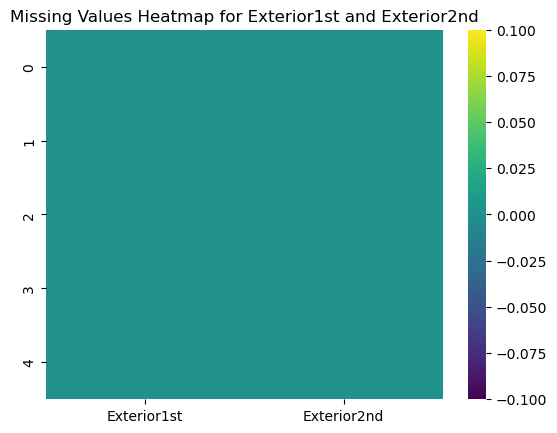

In [244]:
# Example: If columns are named differently but represent similar data
if 'Exterior1st' in df.columns and 'Exterior2nd' in df.columns:
    # Create heatmap for missing values in Exterior1st and Exterior2nd
    sns.heatmap(df[["Exterior1st", "Exterior2nd"]].isnull(), cmap="viridis")
    
    plt.title('Missing Values Heatmap for Exterior1st and Exterior2nd')
    plt.show()
else:
    print("Columns 'Exterior1st' and/or 'Exterior2nd' not found in the DataFrame.")



In [250]:

import pandas as pd

df = pd.DataFrame(data)

# Select rows where either MasVnrType or MasVnrArea is null
missing_data = df[df[['MasVnrType', 'MasVnrArea']].isnull().any(axis=1)]

print(missing_data)


   Id MasVnrType  MasVnrArea  SalePrice
2   3       None         NaN     223500


In [251]:
df["MasVnrType"].value_counts()

MasVnrType
BrkFace    1
None       1
Stone      1
Name: count, dtype: int64

In [254]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Check the column names in your DataFrame
print(df.columns)

# Ensure the correct column name is used for mode calculation
masvnrtype_mode = df["MasVnrType"].mode()[0]

# Replace missing values in MasVnrType column with mode
df["MasVnrType"].fillna(masvnrtype_mode, inplace=True)

# Check for remaining missing values in MasVnrType column
print("Remaining missing values in 'MasVnrType':", df["MasVnrType"].isnull().sum())


Index(['Id', 'MasVnrType', 'MasVnrArea', 'SalePrice'], dtype='object')
Remaining missing values in 'MasVnrType': 0


C:\Users\nehaa\AppData\Local\Temp\ipykernel_12360\14957732.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["MasVnrType"].fillna(masvnrtype_mode, inplace=True)


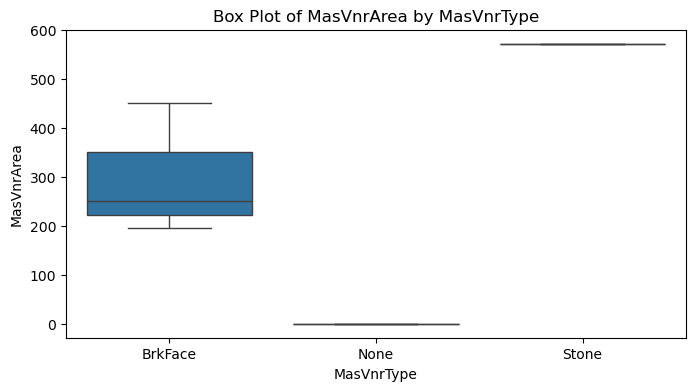

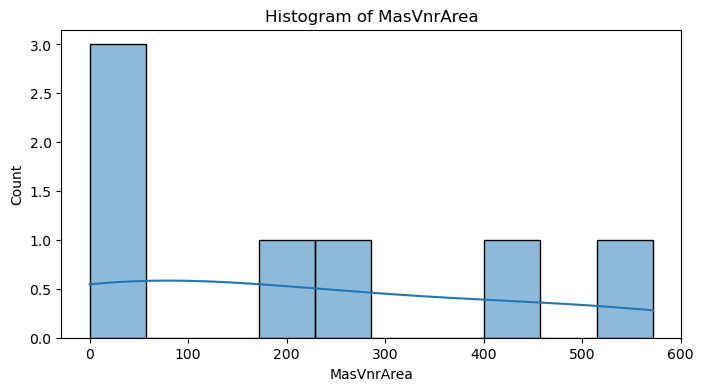

In [268]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame
df = pd.DataFrame({
    'MasVnrType': ['BrkFace', 'None', 'None', 'Stone', 'BrkFace', 'None', 'BrkFace'],
    'MasVnrArea': [196, 0, 0, 572, 250, 0, 450]
})

# Box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x='MasVnrType', y='MasVnrArea', data=df)
plt.title('Box Plot of MasVnrArea by MasVnrType')
plt.xlabel('MasVnrType')
plt.ylabel('MasVnrArea')
plt.show()
# Histogram (Distribution Plot)
plt.figure(figsize=(8, 4))
sns.histplot(df['MasVnrArea'], bins=10, kde=True)
plt.title('Histogram of MasVnrArea')
plt.xlabel('MasVnrArea')
plt.ylabel('Count')
plt.show()


In [287]:
cat_bsmt_feat = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
num_bsmt_feat = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]



In [291]:
print(df.columns)


Index(['MasVnrType', 'MasVnrArea'], dtype='object')


In [292]:
# Step 1: Print all columns in the DataFrame
print("Columns in DataFrame:")
print(df.columns)

# Step 2: Verify basement feature lists against DataFrame columns
print("\nBasement categorical features:")
print(cat_bsmt_feat)
print("\nBasement numerical features:")
print(num_bsmt_feat)


Columns in DataFrame:
Index(['MasVnrType', 'MasVnrArea'], dtype='object')

Basement categorical features:
['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

Basement numerical features:
['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']


## Coverting in Ordinal format 

In [298]:
ordinal_end_var = [

"ExterQual",

"ExterCond",

"BsmtQual",

"BswtCond",

"BsmtExposure",

"BsmtFinType1",

"BsetFinSF1"

"BsmtFinType2",

"HeatingQC"

"KitchenQual",

"FireplaceQu",

"GarageQual"

"GarageCond",

"PoolQC",

"Functional",

"GarageFinish",

"PavedDrive",

"Utilities"
    
]

print("total number of feature to convert in ordinal format:", len(ordinal_end_var))

total number of feature to convert in ordinal format: 15


In [306]:


# Check if 'ExterQual' column exists in df_mvi
if 'ExterQual' in df_mvi.columns:
    # Define the ordered categorical type with specified categories
    cat_type = CategoricalDtype(categories=["Po", "Fa", "Ta", "Gd", "Ex"], ordered=True)
    
    # Convert 'ExterQual' to ordered categorical and then get codes
    codes = df_mvi["ExterQual"].astype(cat_type).cat.codes
    
    # Print the codes to verify
    print(codes)
else:
    print("Column 'ExterQual' not found in DataFrame.")


Column 'ExterQual' not found in DataFrame.


In [307]:
print(df_mvi.columns)


Index(['AnotherColumn'], dtype='object')


In [323]:
import pandas as pd

# Assuming df_mvi is your DataFrame
df_encod = df_mvi.copy()

# Encode categorical features
df_encod = pd.get_dummies(df_encod)

# Identify object-type features
object_features = df_encod.select_dtypes(include="object").columns.tolist()

# Print total object data type features
print("Total object data type features:", len(object_features))

# Print features list
print("Id","MSSubClass","MSZoning","LotFrontage","LotArea","Street","Alley","LotShape","LandContour","LandContour","Utilities","LotConfig","LandSlope",
"Neighborhood","Condition1","Condition2","BldgType","HouseStyle","OverallQual","OverallCond","YearBuilt","YearRemodAdd","RoofStyle","RoofMatl"," MasVnrArea"," ExterQual"), object_features


Total object data type features: 0
Id MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape LandContour LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle OverallQual OverallCond YearBuilt YearRemodAdd RoofStyle RoofMatl  MasVnrArea  ExterQual


(None, [])

In [318]:
# Assuming these are the columns you want to print
columns_to_print = ["Id", "MSSubClass", "MSZoning", "LotFrontage", "LotArea", "Street", "Alley", 
                    "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope"]

# Print the column names
print("Columns to Print:")
for col in columns_to_print:
    print(col, end=", ")  # Printing with comma and space


Columns to Print:
Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, 

In [324]:
df_encod.select_dtypes(include = "object").columns.tolist()

[]

In [325]:
df_encod.head(2)

,Id,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,169277.052498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,1462,187758.393989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


## Split Data for Training and Testing 

In [326]:
df_encod.shape

(4378, 289)

In [327]:
len_train = df_encod.shape[0]
len_train

4378

In [332]:
# Assuming df_encod and the definition of len_train

# Define len_train based on your dataset split strategy
len_train = 1460  # Example value, replace with your actual number of training samples

# Separate features (x_train) and target (y_train) for training data
x_train = df_encod.drop("SalePrice", axis=1)[:len_train]
y_train = df_encod["SalePrice"][:len_train]

# For x_test, you typically use the remaining data after the training set
x_test = df_encod.drop("SalePrice", axis=1)[len_train:]

# Output the shapes to verify
print("Shape of x_train data:", x_train.shape)
print("Shape of y_train data:", y_train.shape)
print("Shape of x_test data:", x_test.shape)


Shape of x_train data: (1460, 288)
Shape of y_train data: (1460,)
Shape of x_test data: (2918, 288)


In [335]:
sc = StandardScaler()
sc.fit(x_train)

# standard deviation :- z=(x-u)/s

x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

C:\Users\nehaa\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [337]:
x_train[:10,:]

array([[-1.72849869,         nan,         nan, ...,  0.        ,
        -0.02618016,  0.        ],
       [-1.72612601,         nan,         nan, ...,  0.        ,
        -0.02618016,  0.        ],
       [-1.72375333,         nan,         nan, ...,  0.        ,
        -0.02618016,  0.        ],
       ...,
       [-1.71188993,         nan,         nan, ...,  0.        ,
        -0.02618016,  0.        ],
       [-1.70951725,         nan,         nan, ...,  0.        ,
        -0.02618016,  0.        ],
       [-1.70714457,         nan,         nan, ...,  0.        ,
        -0.02618016,  0.        ]])

In [338]:
x_test[:10,:]

array([[1.462e+03, 2.000e+01, 8.100e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.463e+03, 6.000e+01, 7.400e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.464e+03, 6.000e+01, 7.800e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.469e+03, 2.000e+01, 8.500e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.470e+03, 2.000e+01, 7.000e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.471e+03, 1.200e+02, 2.600e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [339]:
sc.mean_

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 7.3000966e-18,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 7.3000966e-18,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 7.3000966e-18, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 7.3000966e-18, 7.3000966e-18, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [341]:
sc.n_features_in_

288

In [342]:
sc.n_samples_seen_

array([1460,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 14

In [343]:
sc.scale_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [344]:
sc.var_

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

In [345]:
sc.with_mean

True

In [346]:
sc.with_std

True

## Train ML Model

In [ ]:
!pip install xgboost

In [357]:
from sklearn.svm import SVR

from sklearn.linear_model import LinearRegression 

from sklearn.linear_model import SGDRegressor 

from sklearn.neighbors import KNeighborsRegressor

from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.isotonic import IsotonicRegression

from sklearn.neural_network import MLPRegressor

from xgboost import XGBRegressor

In [360]:
svr = SVR()

lr = LinearRegression()

sgdr = SGDRegressor()

knr =  KNeighborsRegressor()

gpr =  GaussianProcessRegressor()

dtr = DecisionTreeRegressor()

gbr = GradientBoostingRegressor()

rfr = RandomForestRegressor()

xgbr = XGBRegressor()

mlpr = MLPRegressor()

ir =  IsotonicRegression()

In [361]:
models = {"a": ["Linear Regression", lr],

"b":["SVR", svr],

"c":["SGDRegressor", sgdr],

"d":["KNeighbors Regressor", knr],

"e":["Gaussian Process Regressor", gpr],

"f":["Decision TreeRegressor", dtr],

"g":["Gradient Boosting Regressor", gbr],

"h":["Random ForestRegressor", rfr],

"i":["XGBRegressor", xgbr],

"j": ["MLPRegressor", mlpr],

"k": ["IsotonicRegression", ir]

}

In [386]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model (model, x_train=x_train, y_train=y_train):

    cv = KFold(n_splits = 7, shuffle=True, random_state = 45)

    r2 = make_scorer(r2_score) 
    r2_val_score = cross_val_score (model, x_train, y_train, cv=cv, scoring = r2)

    score = [r2_val_score.mean()]

    return score

In [385]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
import numpy as np
import pandas as pd

# Example data loading (replace with your actual data loading code)
# x_train = ...  # Load your features as a numpy array or DataFrame
# y_train = ...  # Load your target variable as a numpy array or Series

# Convert y_train to a numpy array if it's a Series
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train

# Example of checking and handling NaNs in y_train (assuming it's a numpy array)
if np.isnan(y_train).any():  # Check if there are NaNs in y_train
    imputer = SimpleImputer(strategy='mean')
    y_train_imputed = imputer.fit_transform(y_train.reshape(-1, 1)).ravel()  # Impute NaNs in y_train
else:
    y_train_imputed = y_train  # If no NaNs, use y_train directly

# Example of checking and handling NaNs in x_train (assuming it's a numpy array or DataFrame)
if isinstance(x_train, pd.DataFrame):
    x_train = x_train.values  # Convert DataFrame to numpy array if needed

if np.isnan(x_train).sum() > 0:  # Check if there are NaNs in x_train
    imputer = SimpleImputer(strategy='mean')
    x_train_imputed = imputer.fit_transform(x_train)
else:
    x_train_imputed = x_train  # If no NaNs, use x_train directly

# Train models
models = {
    'LinearRegression': (LinearRegression(), 'Linear Regression'),
    'SVR': (SVR(), 'Support Vector Regression'),
    'SGDRegressor': (SGDRegressor(), 'Stochastic Gradient Descent Regressor'),
    'KNeighborsRegressor': (KNeighborsRegressor(), 'K-Neighbors Regressor'),
    'GaussianProcessRegressor': (GaussianProcessRegressor(), 'Gaussian Process Regressor'),
    'DecisionTreeRegressor': (DecisionTreeRegressor(), 'Decision Tree Regressor'),
    'GradientBoostingRegressor': (GradientBoostingRegressor(), 'Gradient Boosting Regressor'),
    'RandomForestRegressor': (RandomForestRegressor(), 'Random Forest Regressor'),
    'XGBRegressor': (XGBRegressor(), 'XGBoost Regressor'),
    'MLPRegressor': (MLPRegressor(), 'MLP Regressor'),
    'IsotonicRegression': (IsotonicRegression(), 'Isotonic Regression')
}

def test_model(model, x_train, y_train):
    cv = KFold(n_splits=7, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, x_train, y_train, cv=cv, scoring=r2)
    score = [r2_val_score.mean()]
    return score

models_scores = []

for model_name, (model_instance, model_label) in models.items():
    print(f"Training model: {model_label}")
    score = test_model(model_instance, x_train_imputed, y_train_imputed)
    print(f"Score of {model_label}: {score}")
    models_scores.append([model_label, score[0]])

print("\nModels Scores:")
for model_label, score in models_scores:
    print(f"{model_label}: {score}")


Training model: Linear Regression
Score of Linear Regression: [-0.026389726670576676]
Training model: Support Vector Regression
Score of Support Vector Regression: [-0.006596193402929463]
Training model: Stochastic Gradient Descent Regressor
Score of Stochastic Gradient Descent Regressor: [-2347787496518.004]
Training model: K-Neighbors Regressor
Score of K-Neighbors Regressor: [-0.06229597438218342]
Training model: Gaussian Process Regressor
Score of Gaussian Process Regressor: [-0.08853375859532983]
Training model: Decision Tree Regressor
Score of Decision Tree Regressor: [-0.551754994178479]
Training model: Gradient Boosting Regressor
Score of Gradient Boosting Regressor: [0.013499197162836636]
Training model: Random Forest Regressor
Score of Random Forest Regressor: [-0.1542056371408946]
Training model: XGBoost Regressor
Score of XGBoost Regressor: [-0.10153863960488807]
Training model: MLP Regressor


C:\Users\nehaa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nehaa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nehaa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nehaa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nehaa\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Score of MLP Regressor: [-118.86137435708578]
Training model: Isotonic Regression


C:\Users\nehaa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ValueError: 
All the 7 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nehaa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nehaa\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nehaa\anaconda3\Lib\site-packages\sklearn\isotonic.py", line 385, in fit
    X, y = self._build_y(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nehaa\anaconda3\Lib\site-packages\sklearn\isotonic.py", line 300, in _build_y
    self._check_input_data_shape(X)
  File "C:\Users\nehaa\anaconda3\Lib\site-packages\sklearn\isotonic.py", line 284, in _check_input_data_shape
    raise ValueError(msg)
ValueError: Isotonic regression input X should be a 1d array or 2d array with 1 feature
